 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the {SNP500} Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous 'whale' investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the {SNP500} Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
#Variable Constants
DATE = 'Date'
CLOSE = 'Close'
PORTFOLIOS = 'Portfolios'
PORTFOLIOS_MARKET = f'{PORTFOLIOS}/Market'
DAILY = 'Daily'
RETURNS = 'Returns'
DAILY_RETURNS = f'{DAILY} {RETURNS}'
SNP500 = 'S&P 500'
STD = 'Standard Deviation'
SHARP_RATIO = 'Sharp Ratio'
BOLD = 'bold'
LABEL_FONTSIZE = 18
TITLE_FONTSIZE = 24
PLOT_FONTSIZE = 14
FIGSIZE_WIDTH = 20

#3 Utility Methods
get_transformed_df = lambda file_name: pd.read_csv(Path(f'./Resources/{file_name}.csv'), 
                                                  index_col=DATE, 
                                                  parse_dates=True, 
                                                  infer_datetime_format=True).sort_index()

def print_na(df):
    na_sum = df.isna().sum()
    print(f'\nTotal Nulls: {na_sum.sum()}\n\n{na_sum}\n')

def drop_print_na(df):
    df.dropna(inplace=True)
    print_na(df)

In [3]:
# Reading whale returns
whale_df = get_transformed_df(f'whale_{RETURNS.lower()}')
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
print_na(whale_df)


Total Nulls: 4

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64



In [5]:
# Drop nulls
drop_print_na(whale_df)


Total Nulls: 0

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64



## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_df = get_transformed_df(f'algo_{RETURNS.lower()}')
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [7]:
# Count nulls
print_na(algo_df)


Total Nulls: 6

Algo 1    0
Algo 2    6
dtype: int64



In [8]:
# Drop nulls
drop_print_na(algo_df)


Total Nulls: 0

Algo 1    0
Algo 2    0
dtype: int64



## S&P 500 Returns

Read the {SNP500} historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_df = get_transformed_df('sp500_history')
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df[CLOSE] = sp500_df[CLOSE].str.replace(f'$', f'', regex=True)
sp500_df[CLOSE] = sp500_df[CLOSE].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_df[CLOSE] = sp500_df[CLOSE].pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
print_na(sp500_df)
drop_print_na(sp500_df)


Total Nulls: 1

Close    1
dtype: int64


Total Nulls: 0

Close    0
dtype: int64



In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={CLOSE: SNP500})
sp500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the {SNP500} Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_df, algo_df, sp500_df], axis=1, join='inner')
returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [16]:
portfolio_df = returns_df.copy().drop(columns=SNP500)

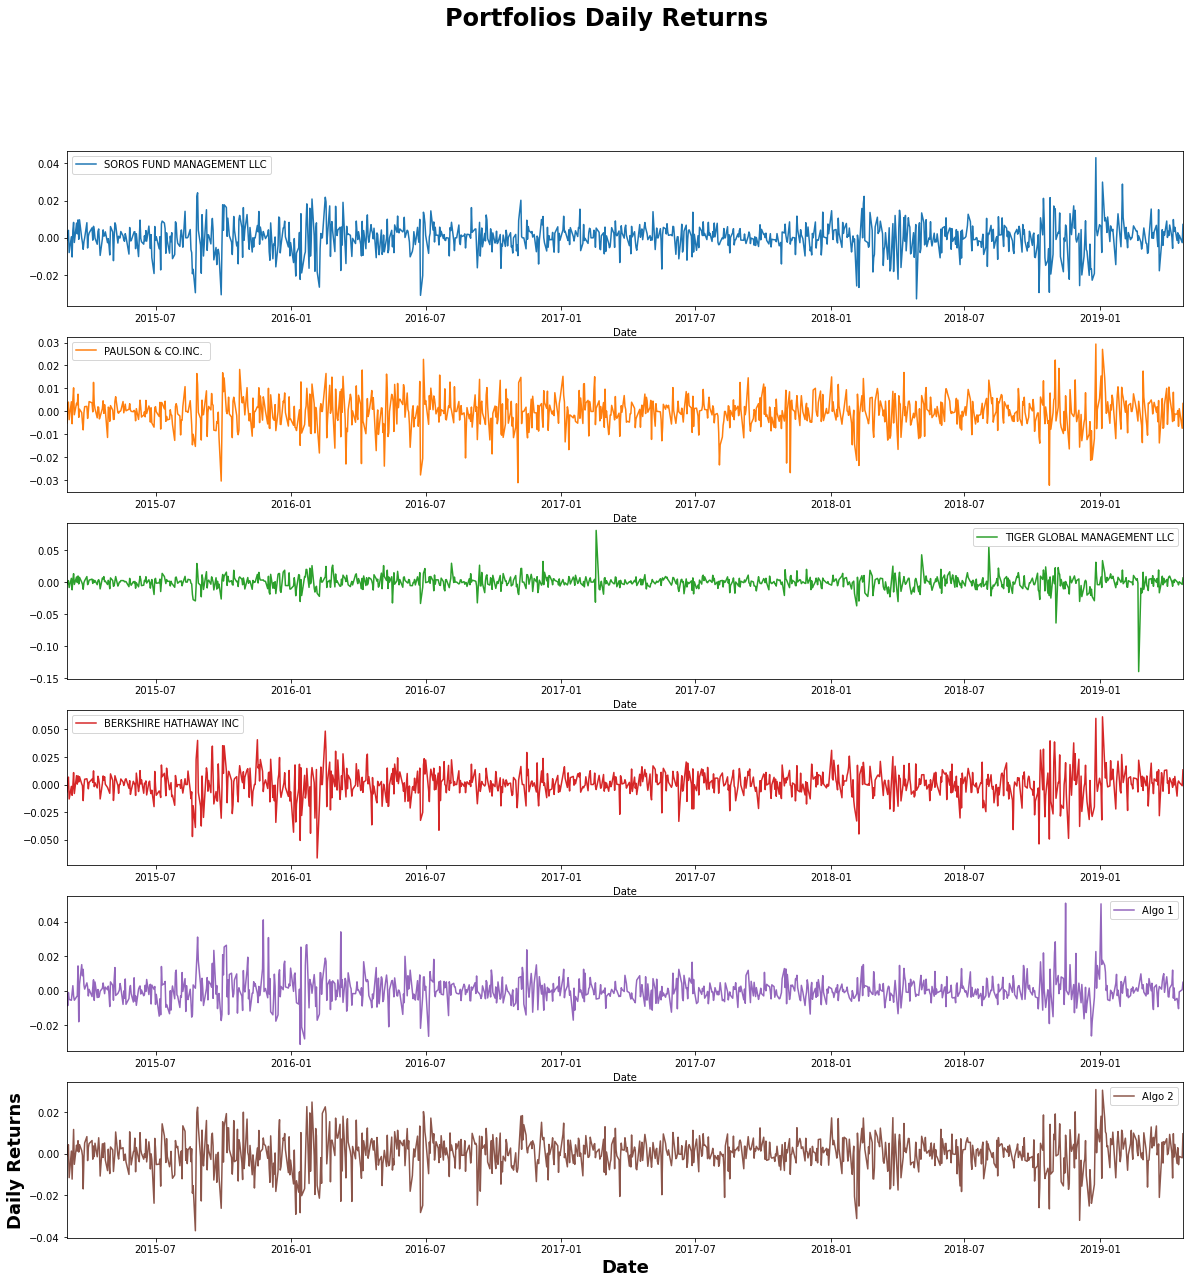

In [46]:
# Plot daily returns of all portfolios
portfolio_df.plot(subplots=True, 
                sharex=False,
                sharey=False,
                figsize=(FIGSIZE_WIDTH,20),
                xlim=['2015-03-03', '2019-04-23']);
plt.xlabel(DATE, fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.ylabel(f'{DAILY} {RETURNS}', fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.suptitle(f'{PORTFOLIOS} {DAILY_RETURNS}', fontsize=TITLE_FONTSIZE, fontweight=BOLD);

#### Calculate and Plot cumulative returns.

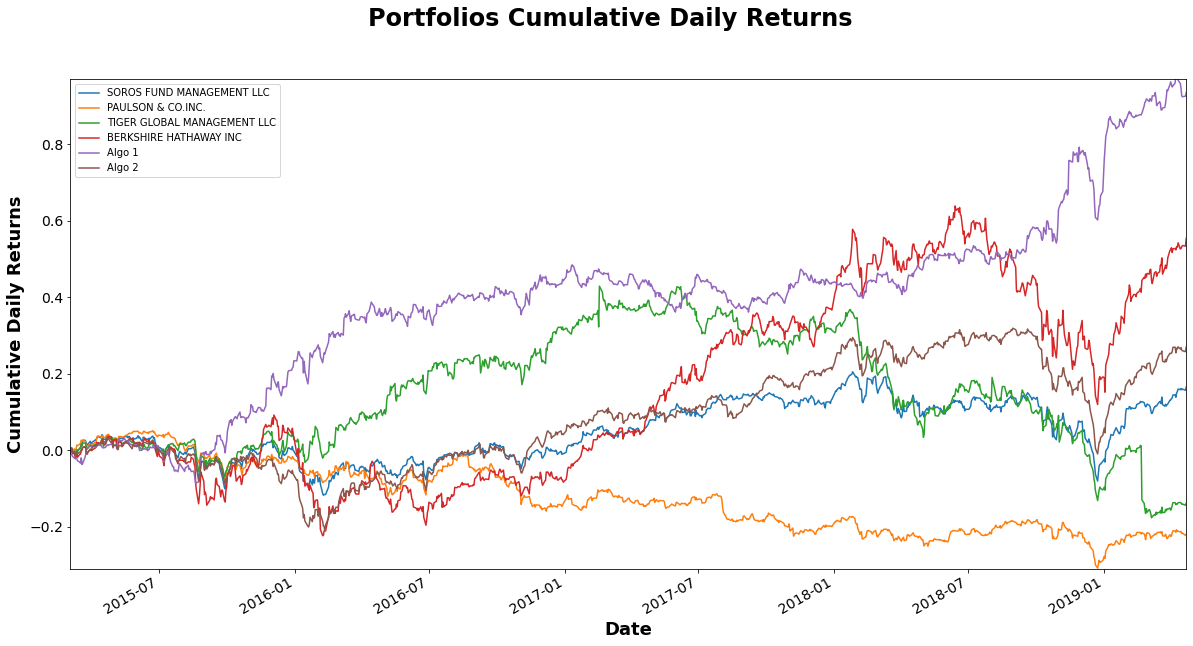

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + portfolio_df).cumprod() - 1
# Plot cumulative returns
CUMULATIVE_DAILY_RETURNS = f'Cumulative {DAILY} {RETURNS}'
cumulative_returns_df.plot(
                figsize=(FIGSIZE_WIDTH,10),
                fontsize=PLOT_FONTSIZE,
                xlim=['2015-03-03', '2019-04-23'],
                ylim=[-0.31,0.97]);
plt.xlabel(DATE, fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.ylabel(CUMULATIVE_DAILY_RETURNS, fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.suptitle(f'{PORTFOLIOS} {CUMULATIVE_DAILY_RETURNS}', fontsize=TITLE_FONTSIZE, fontweight=BOLD);

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


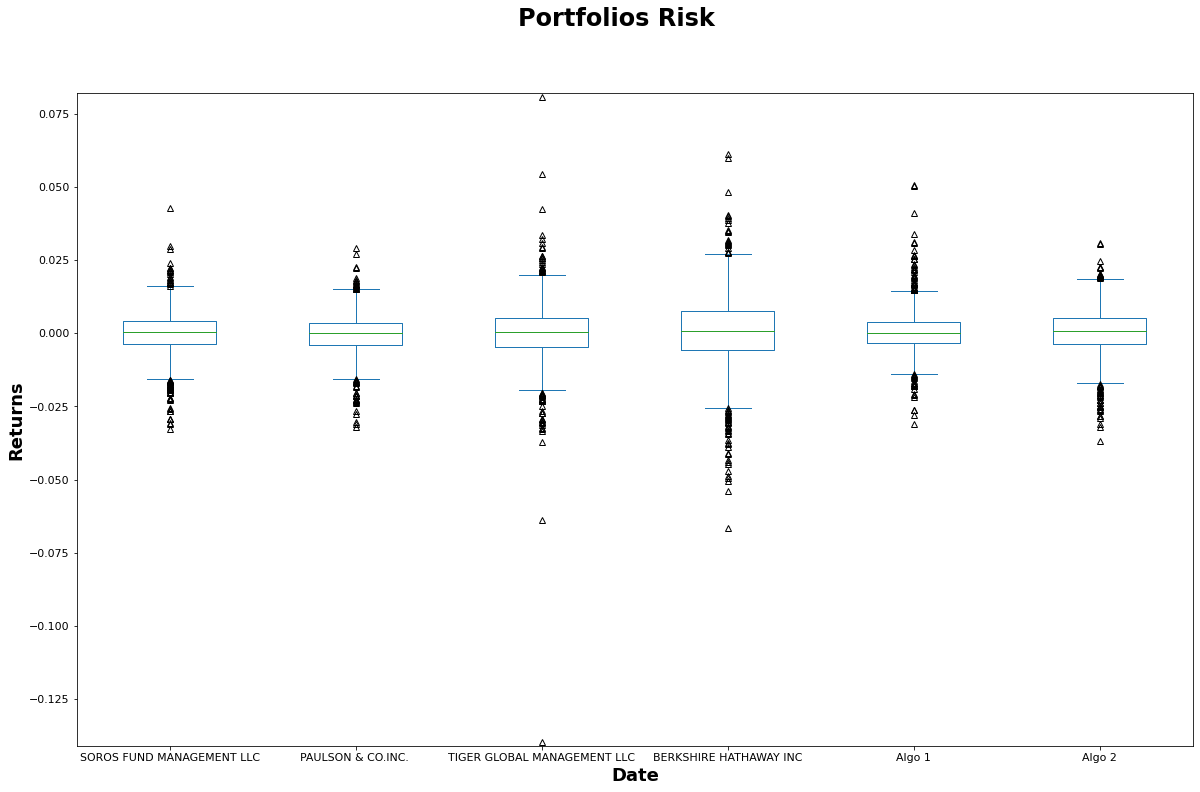

In [19]:
# Box plot to visually show risk
portfolio_df.plot(kind='box', 
                  figsize=(FIGSIZE_WIDTH,12), 
                  sym='^',
                  fontsize=11,
                  ylim=[-0.141, 0.082]);
plt.suptitle(f'{PORTFOLIOS} Risk', fontsize=TITLE_FONTSIZE, fontweight=BOLD);
plt.xlabel(DATE, fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.ylabel(RETURNS,fontsize=LABEL_FONTSIZE, fontweight=BOLD);

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_df.std()
print(STD + ':')
portfolio_std

Standard Deviation:


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = round(returns_df[SNP500].std(),6)
print(f'{SNP500} {DAILY} {STD}: {sp500_std}')
# Determine which portfolios are riskier than the S&P 500
portfolio_std > sp500_std

S&P 500 Daily Standard Deviation: 0.008554


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
print(f'Annualized {STD}:')
returns_df.std() * np.sqrt(252)

Annualized Standard Deviation:


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the {SNP500}
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the {SNP500}

### Calculate and plot rolling `std` for all portfolios with 21-day window

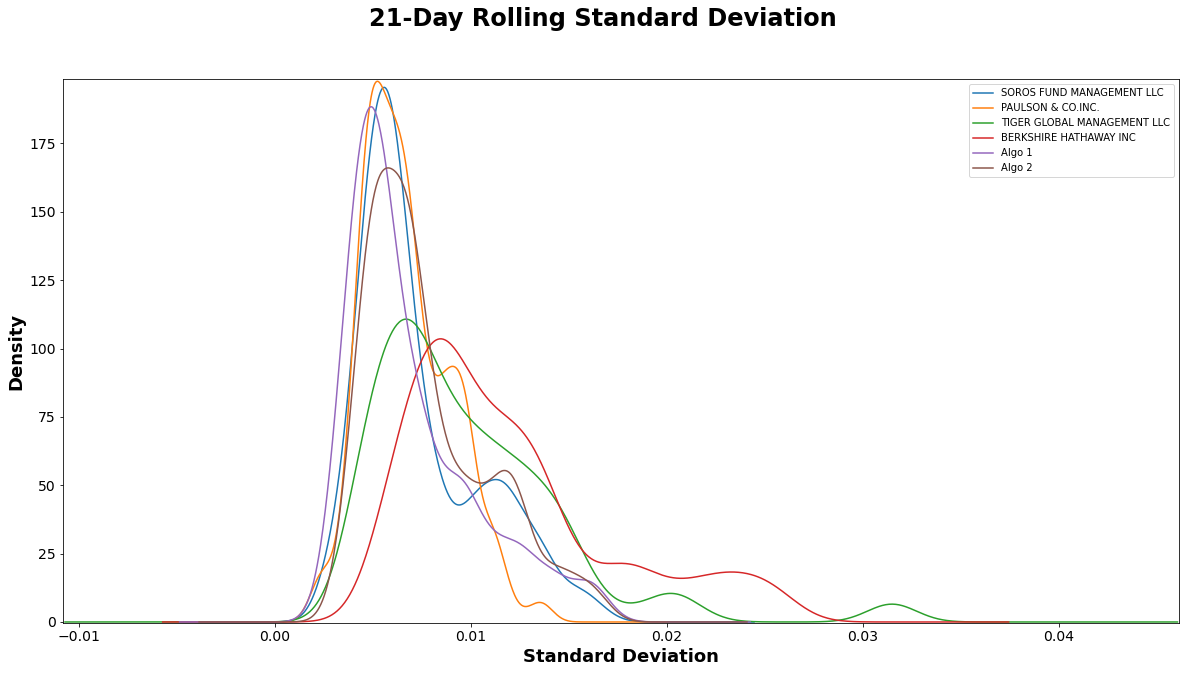

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_portfolio_std = portfolio_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_portfolio_std.plot(kind='kde',
                           figsize=(FIGSIZE_WIDTH,10),
                           xlim=[-0.0108, 0.0461],
                           ylim=[-0.3,198.5], 
                           fontsize=PLOT_FONTSIZE);
plt.xlabel(STD, fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.ylabel('Density', fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.suptitle(f'21-Day Rolling {STD}', fontsize=TITLE_FONTSIZE, fontweight=BOLD);

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


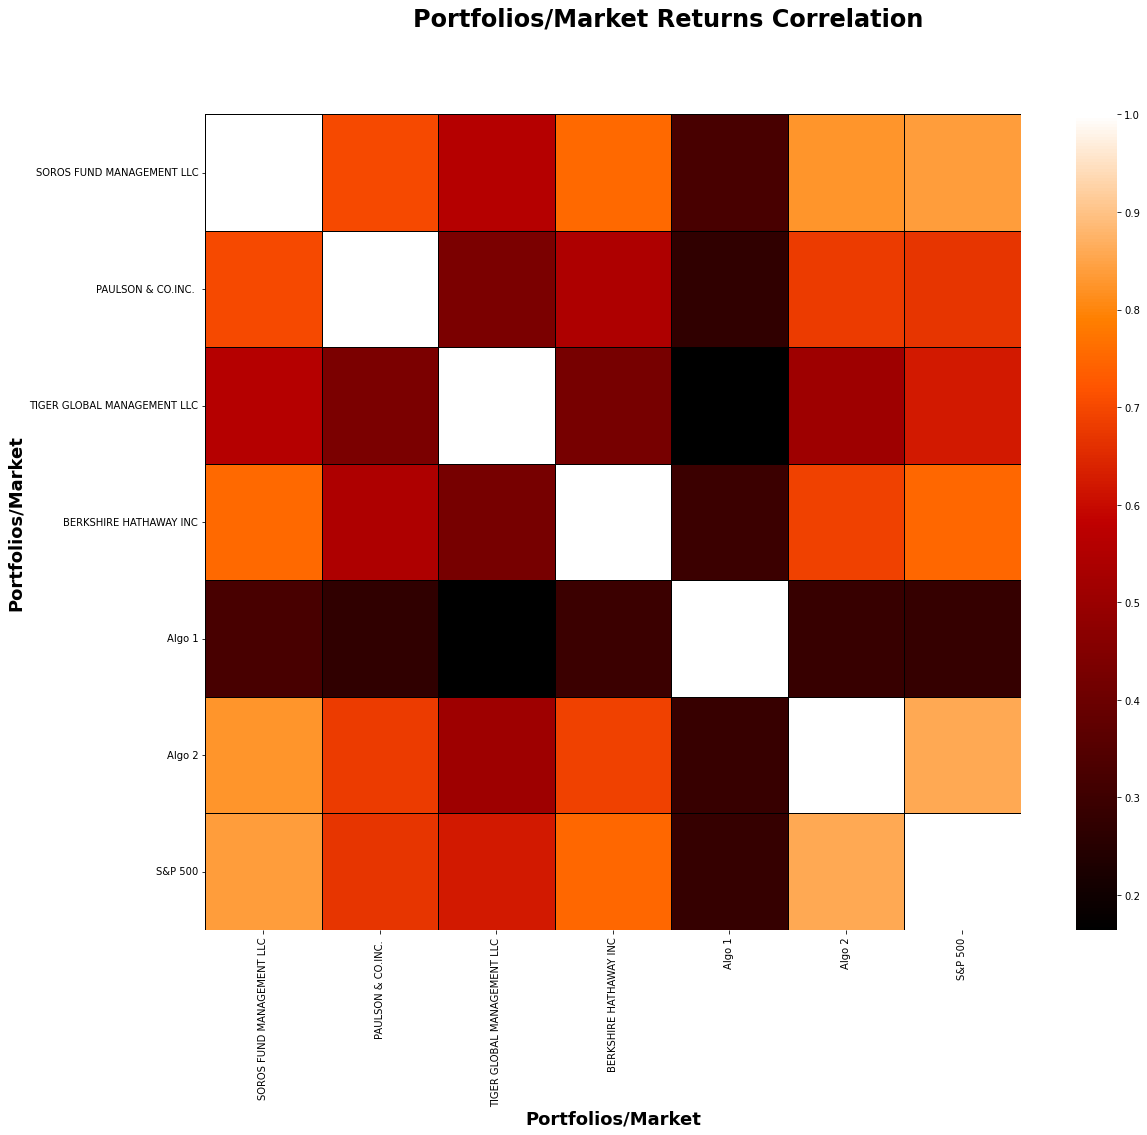

In [24]:
# Calculate the correlation
returns_correlation_df = returns_df.corr()
# Display the correlation matrix
plt.figure(figsize=(FIGSIZE_WIDTH,15))
portfolio_market = PORTFOLIOS_MARKET
plt.suptitle(f'{PORTFOLIOS_MARKET} {RETURNS} Correlation', fontsize=TITLE_FONTSIZE, fontweight=BOLD)
plt.xlabel(PORTFOLIOS_MARKET, fontsize=LABEL_FONTSIZE, fontweight=BOLD)
plt.ylabel(PORTFOLIOS_MARKET,fontsize=LABEL_FONTSIZE, fontweight=BOLD)
sns.heatmap(returns_correlation_df,
                cmap='gist_heat', 
                linecolor='black', 
                linewidth=1,
                square=True).set(xlabel=portfolio_market, 
                                 ylabel=portfolio_market);

returns_correlation_df

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

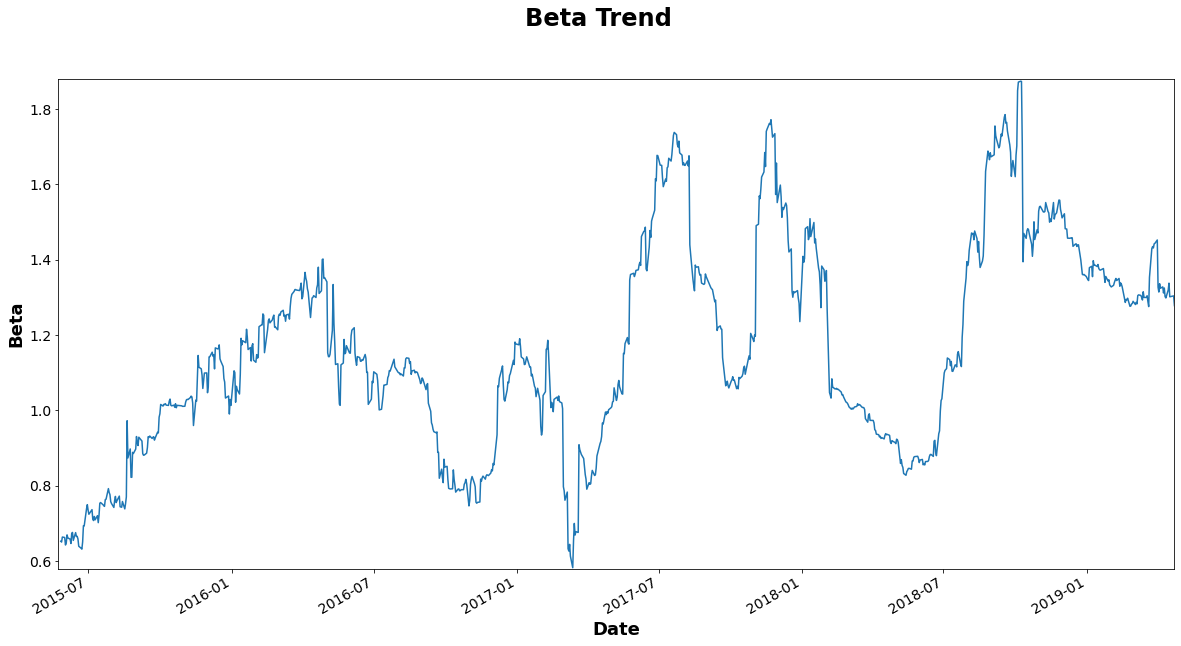

In [25]:
# Calculate covariance of a single portfolio
covariance = returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(returns_df[SNP500])
# Calculate variance of S&P 500
variance = returns_df[SNP500].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(FIGSIZE_WIDTH,10), 
          xlim=['2015-05-24', '2019-04-23'],
          ylim=[0.58, 1.88], 
          fontsize=PLOT_FONTSIZE);
plt.suptitle('Beta Trend', fontsize=TITLE_FONTSIZE, fontweight=BOLD);
plt.xlabel(DATE, fontsize=LABEL_FONTSIZE, fontweight=BOLD);
plt.ylabel('Beta',fontsize=LABEL_FONTSIZE, fontweight=BOLD);

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window
returns_df.ewm(halflife=21).std()[1:]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = returns_df.mean()/returns_df.std()*252**0.5

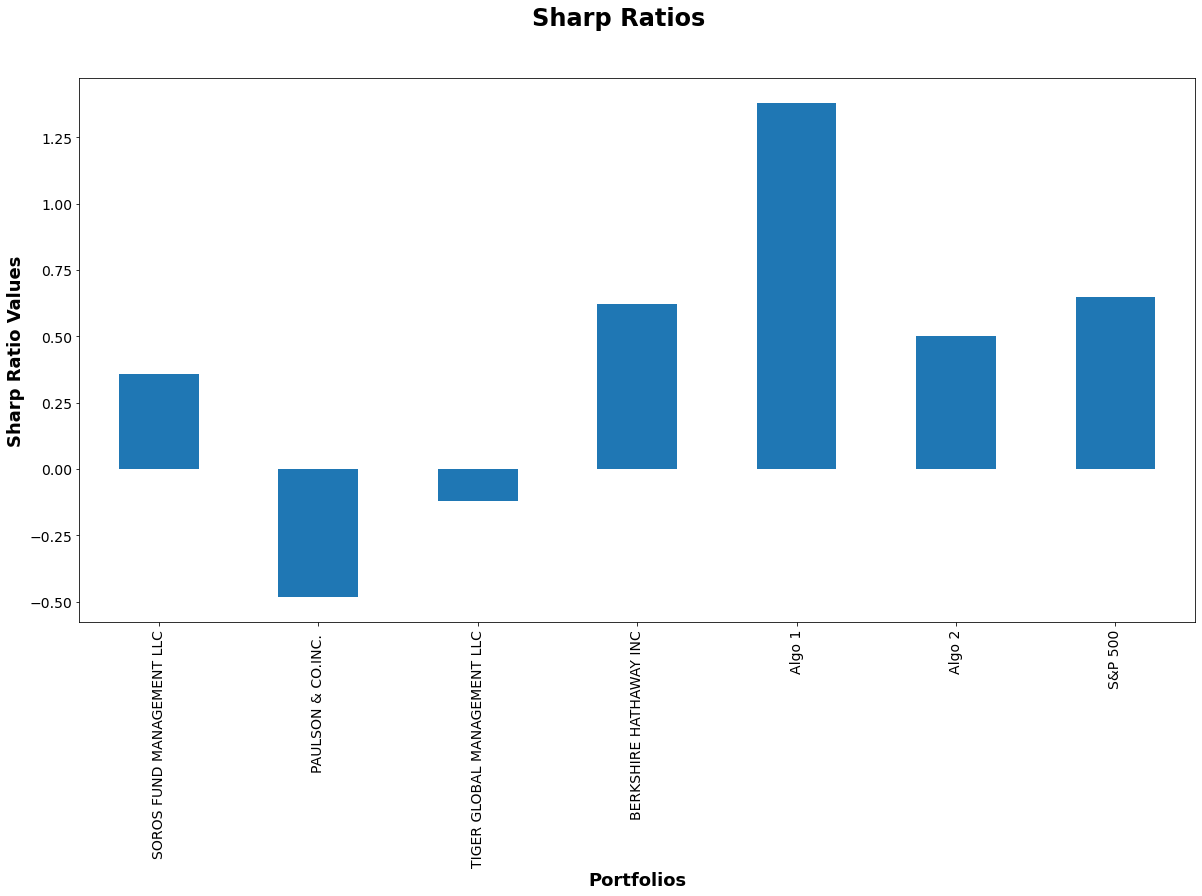

In [28]:
# Visualize the sharpe ratios as a bar plot
plt.xlabel(PORTFOLIOS,fontsize=LABEL_FONTSIZE, fontweight=BOLD)
plt.ylabel(f'{SHARP_RATIO} Values',fontsize=LABEL_FONTSIZE, fontweight=BOLD)
plt.suptitle(f'{SHARP_RATIO}s', fontsize=TITLE_FONTSIZE, fontweight=BOLD)
annualized_sharpe_ratios.plot(kind='bar', fontsize=PLOT_FONTSIZE, figsize=(FIGSIZE_WIDTH,10));

### Determine whether the algorithmic strategies outperform both the market S&P 500 and the whales portfolios.

Write your answer here!

The Algo 1 strategy does outperform the market (S&P 500) as well as all of the whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC) as it has a higher sharp ratio than all of the whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC) as well as the market (S&P 500). The Algo 2 strategy, on the other hand, underperforms both against the market (S&P 500), as well as the whale BERKSHIRE HATHAWAY INC as it has a lower sharp ratio than both of them (BERKSHIRE HATHAWAY INC, S&P 500/market), but it does still outperform against the other three whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. and TIGER GLOBAL MANAGEMENT LLC), with a higher sharp ratio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock


In [30]:
# Reading data from 2nd stock


In [31]:
# Reading data from 3rd stock


In [32]:
# Combine all stocks in a single DataFrame


In [33]:
# Reset Date index


In [34]:
# Reorganize portfolio data by having a column per symbol


In [35]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [40]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [42]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios


In [44]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!